In [1]:
from functools import partial 

from sepal_ui import widgetFactory as wf
from sepal_ui import widgetBinding as wb
from sepal_ui.scripts import utils as su
import ipyvuetify as v

from scripts import sepal_process as sepal_run 
from utils import messages as ms
from utils import parameters as pm

In [2]:
#class io as mutable object
class Ga_sepal_io:
    def __init__(self):
        self.toto = None
        
ga_sepal_io = Ga_sepal_io()

In [3]:
#output 
ga_sepal_output = wf.OutputWidget(ms.SEPAL_INTRO)

#btn 
ga_sepal_btn = wf.ProcessBtn(ms.SEPAL_BTN)

#process output 
ga_oft_output = wf.OutputWidget(ms.NO_PROCESS)

#tile 
id_ = 'sepal_widget'
title = 'Postprocess'

ga_sepal = wf.Tile(
    id_,
    title,
    btn=ga_sepal_btn,
    output=ga_sepal_output,
    inputs=['']
)

#add the oft_output
ga_sepal.children[0].children[1].children = ga_sepal.children[0].children[1].children + [ga_oft_output]

In [4]:
#create the tile with the links
id_ = "results_widget"
title = "Results"
    
ga_results = wf.Tile(id_, title, inputs=[''])

In [5]:
#defin a custom function 

def process_start (widget, event, data, output, oft_output):
    
    asset = getattr(ga_aoi_io, 'assetId')
    year = getattr(ga_gee_io, 'year')
    
    #toggle the loading button
    su.toggleLoading(widget)
    
    #check inputs
    if not wb.checkInput(asset, output, ms.NO_AOI): return su.toggleLoading(widget)
    if not wb.checkInput(year, output, ms.NO_YEAR): return su.toggleLoading(widget)
    
    try:
        alerts_link, stats_link = sepal_run.sepal_process(asset, year, output, oft_output)
    except Exception as e: 
        alerts_link = None
        su.displayIO(output, str(e), 'error')
        
    if alerts_link:
        #display the layout in the tile
        layout = sepal_run.display_results(asset,year, alerts_link)
        ga_results.children[0].children = [ga_results.children[0].children[0]] + layout
    
    #toggle the loading button
    su.toggleLoading(widget)
    
    return 

ga_sepal_btn.on_event('click', partial(
    process_start, 
    output = ga_sepal_output,
    oft_output = ga_oft_output
))

Layout(align_center=True, children=[Card(children=[Html(children=['Postprocess'], tag='h2'), Flex(children=[La…

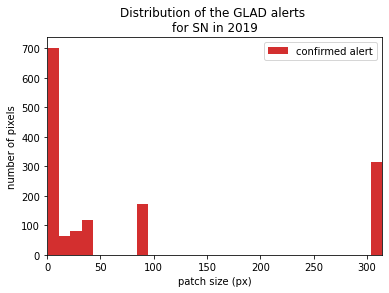

In [6]:
ga_sepal

In [7]:
ga_results

Layout(align_center=True, children=[Card(children=[Html(children=['Results'], tag='h2'), Flex(children=[Layout…